# The law of large numbers

### What are the odds of winning in Black Jack

The following is a simulation of the game Black Jack. We run it many times and use it to estimate the probabilities of winning. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import random

In [17]:


def draw_card():
    """Simulates drawing a card, ace counts as 11 or 1 to avoid busting if possible."""
    return random.randint(1, 13)  # 1-10 for number cards, 11 for Jack, 12 for Queen, 13 for King

def card_value(card, player_score):
    """Interprets the cards value. face cards are 10, 
        and an ace is interpreted as 1 or 11, depending what is better
        for the player
    """
    if card == 1:
        if player_score <= 10:
            return 11
        else:
            return 1
    else:
        return min(card, 10) 

def play_hand():
    """Simulates playing a single hand for both player and dealer."""
    player_total, dealer_total = 0, 0
    while player_total < 17:
        player_total += card_value(draw_card(), player_total)
        if player_total > 21: return 'lose'  # Player busts
    while dealer_total < 17:
        dealer_total += card_value(draw_card(), dealer_total)
        if dealer_total > 21: return 'win'  # Dealer busts
    if player_total > dealer_total: return 'win'
    elif player_total < dealer_total: return 'lose'
    else: return 'draw'

# Simulate a large number of hands
n_simulations = 1000
results = [play_hand() for _ in range(n_simulations)]

# Calculate and print win probability
win_probability = results.count('win') / n_simulations
print(f"Estimated probability of winning a hand in blackjack: {win_probability:.3f}")


Estimated probability of winning a hand in blackjack: 0.406


### Estimating the mean

The following simulation shows how estimating the mean from a sample of size `n_samples` is more and more precise the larger `n_samples` is. 

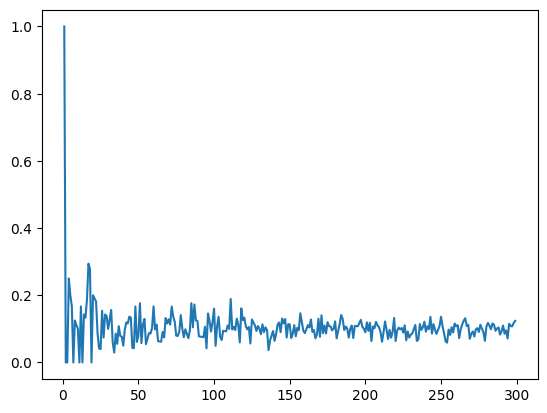

In [20]:
n_samples = 500

def estimate_mean(dist, n_samples):
    """estimate the mean of n_samples from the given distribution"""
    mean_est = 0
    for i in range(0, n_samples):
        mean_est = mean_est + dist.rvs()
    mean_est = mean_est / n_samples 

    return mean_est

# estimate the mean for differnt sample sizes     
estimates = []
ns = range(1, 300)
for n_samples in ns:
    estimates.append(estimate_mean(stats.bernoulli(0.1), n_samples))

plt.plot(ns, estimates)

### Polls 

Assume you ask `n` people what they would vote in a yes/no question and estimate the probability that somebody votes yes. The answer is not exact, but you can make it as accurate as you want, by increasing the number of people you poll. 

0.6957


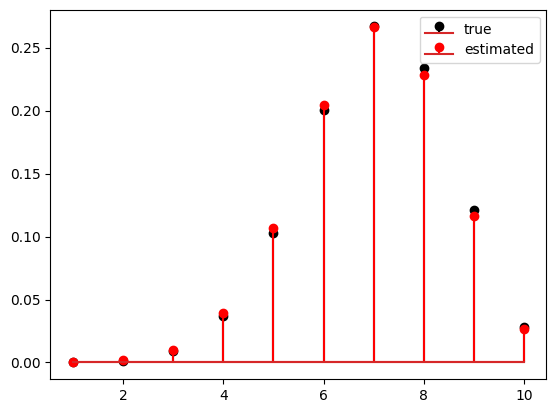

In [36]:
true_prob = 0.7 # the true probability

def ask(n):
    answers = []
    bern = stats.bernoulli(true_prob)
    for i in range(0, n):        
        answers.append(bern.rvs())
    return answers
    
answers = ask(10000)
p_est = sum(answers) / len(answers)
print(p_est)

binom = stats.binom(n, true_prob)
binom_est = stats.binom(n, p_est)
x=list(range(1, n+1))
plt.stem(x, binom.pmf(x), 'k', label='true')
plt.stem(x, binom_est.pmf(x), 'r', label='estimated')
plt.legend()